TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

y : CDRGLOB
X : all columns except for the label
Train-test split: .80-.20 (please use the stratify parameter)
Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.

In [135]:
import pandas as pd
import numpy as np

data = pd.read_excel('Temporary_data3_Left_Right_Copy.xlsx')
y = data['CDRGLOB']
X = data.drop('CDRGLOB',axis=1)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1,stratify=y)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

from sklearn.model_selection import cross_val_score
print("k=5 için: ", cross_val_score(model, X, y, cv=5), "\nOrtalama:",cross_val_score(model, X, y, cv=5).mean())
print("k=10 için: ", cross_val_score(model, X, y, cv=10), "\nOrtalama:",cross_val_score(model, X, y, cv=10).mean())

k=5 için:  [0.43173432 0.45756458 0.56457565 0.46125461 0.4037037 ] 
Ortalama: 0.4637665709990433
k=10 için:  [0.42647059 0.44117647 0.36764706 0.53676471 0.59259259 0.59259259
 0.52592593 0.38518519 0.37037037 0.5037037 ] 
Ortalama: 0.4742429193899782


TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its 3 parameters at least with 5 different values for each) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values on the test dataset. 

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()                                                
model.fit(Xtrain, ytrain)  
y_model = model.predict(Xtest)
print("DecisionTreeClassifier default parametreler ile doğruluk oranı: ",accuracy_score(ytest, y_model))

DecisionTreeClassifier default parametreler ile doğruluk oranı:  0.616519174041298


In [129]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2,6)),'min_samples_split': [2, 3, 4, 5, 6], 'random_state': [2,4,6,8,10]}
gridCV = GridSearchCV(estimator=model, param_grid=[params] ,cv=5)
gridCV = gridCV.fit(Xtrain, ytrain)
print("Best score:", gridCV.best_score_)
print("En iyi parametreler: ", gridCV.best_params_)
y_model2 = gridCV.best_estimator_.fit(Xtrain, ytrain).predict(Xtest)
print("En iyi parametrelerle doğruluk oranı" , accuracy_score(ytest, y_model2))

Best score: 0.6788177339901478
En iyi parametreler:  {'max_leaf_nodes': 5, 'min_samples_split': 2, 'random_state': 2}
En iyi parametrelerle doğruluk oranı 0.672566371681416


TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels (separately for true labels and predicted labels in 2 different graphs). For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

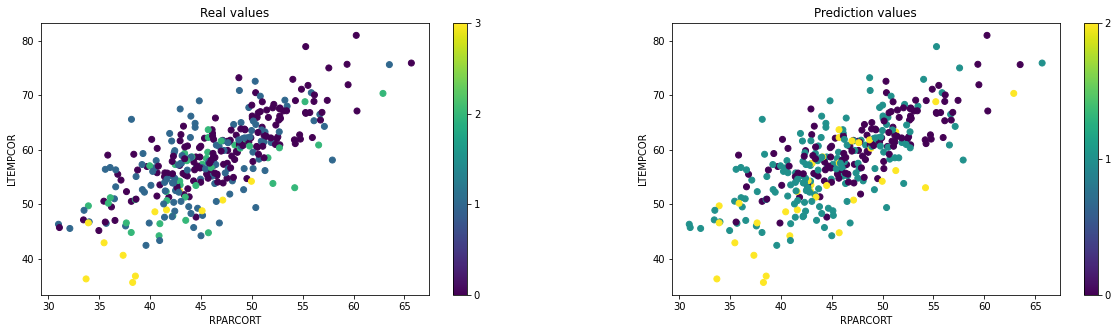

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(Xtest["RPARCORT"], Xtest["LTEMPCOR"],c=ytest)
plt.colorbar(ticks=[0,1,2,3])
plt.title("Real values")
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1, 2, 2)
plt.scatter(Xtest["RPARCORT"], Xtest["LTEMPCOR"],c=y_model2)
plt.colorbar(ticks=[0,1,2,3])
plt.title("Prediction values")
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions. 

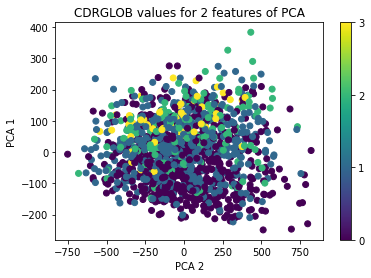

In [131]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_trans = pca.fit_transform(X)
plt.figure()
plt.scatter(pca_trans[:,0], pca_trans[:,1],c=y)
plt.colorbar(ticks=[0,1,2,3])
plt.title("CDRGLOB values for 2 features of PCA")
plt.ylabel("PCA 1")
plt.xlabel("PCA 2")
plt.show()

TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education. 


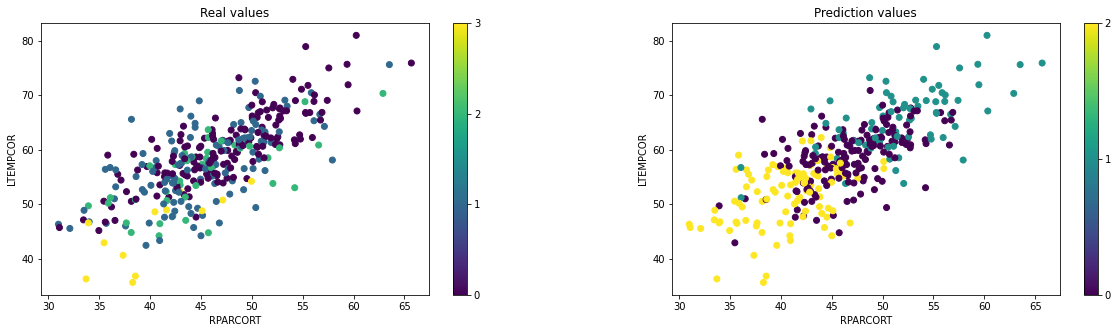

0.3333333333333333

In [132]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model = model.fit(Xtrain,ytrain).predict(Xtest)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(Xtest["RPARCORT"], Xtest["LTEMPCOR"],c=ytest)
plt.colorbar(ticks=[0,1,2,3])
plt.title("Real values")
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1, 2, 2)
plt.scatter(Xtest["RPARCORT"], Xtest["LTEMPCOR"],c=model)
plt.colorbar(ticks=[0,1,2,3])
plt.title("Prediction values")
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show()
accuracy_score(ytest, model)